In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [3]:
df_student_after_score = pd.read_csv('student_after_score.csv', encoding='1251')

In [5]:
df_student_after_score.head()

,student_id,after_score
0,1,92
1,2,79
2,3,92
3,4,90
4,5,98


In [6]:
df_student_before_score = pd.read_csv('student_before_score.csv', encoding='1251')

In [7]:
df_student_before_score.head()

,student_id,before_score
0,1,75
1,2,81
2,3,58
3,4,47
4,5,76


In [9]:
df_group = pd.read_csv('student_group.csv', encoding='1251')

In [11]:
df_group.head()

,student_id,group
0,1,no_course
1,2,course
2,3,course
3,4,course
4,5,course


In [22]:
# выбираем тех студентов, которые прошли курсы
df_student_af_course = df_student_after_score.loc[df_group['group']=='course']

In [35]:
df_student_af_course.head()

,student_id,after_score
1,2,79
2,3,92
3,4,90
4,5,98
5,6,76


In [24]:
# выбираем этих же студентов, но до того, как они прошли курсы
df_student_bf_course = df_student_before_score.loc[df_group['group']=='course']

In [36]:
df_student_bf_course.head()

,student_id,before_score
1,2,81
2,3,58
3,4,47
4,5,76
5,6,67


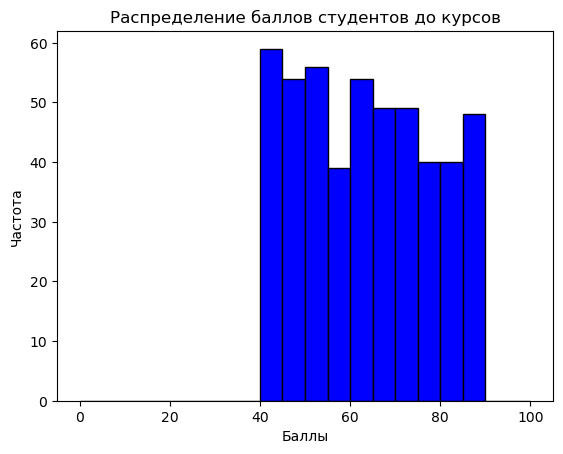

In [37]:
# смотрим, является ли распределение баллов студентов до прохождения курсов нормальным
plt.hist(df_student_bf_course['before_score'], bins=20, color='blue', edgecolor='black', range=(0, 100))
plt.title('Распределение баллов студентов до курсов')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.show()

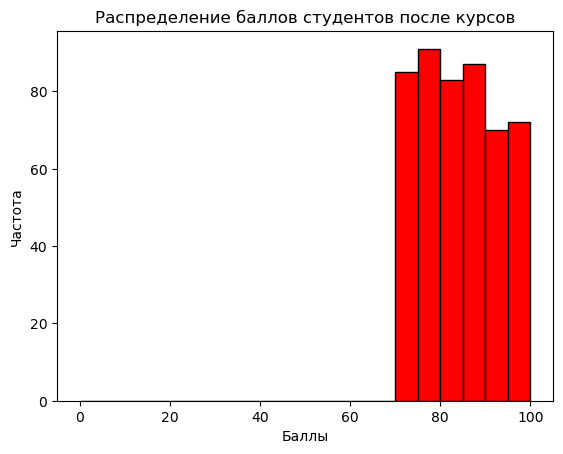

In [38]:
# смотрим на распределение баллов этих же студентов после прохождения курсов
plt.hist(df_student_af_course['after_score'], bins=20, color='red', edgecolor='black', range=(0, 100))
plt.title('Распределение баллов студентов после курсов')
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.show()

In [34]:
# Видим, что распределения в обоих случаях не являются нормальными, значит не можем применить t-test.
# В таком случае применяем критерий Манна-Уитни.
# Также уже визуально можно заметить значительные различия между распределениями баллов студентов до прохождения курсов и после,
# осталось лишь подтвердить это статистическим тестом

statistic, p_value = mannwhitneyu(df_student_bf_course['before_score'], df_student_af_course['after_score'])

print(f'Значение статистики: {statistic}')
print(f'p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('Получили статистически значимые различия')
    print('Делаем вывод: посещение курсов повлияло на балл студентов!')
else:
    print('Не получили статистически значимых различий')
    print('Делаем вывод: посещение курсов не повлияло на балл студентов!')

Значение статистики: 30407.5
p-value: 3.23053961900692e-90
Получили статистически значимые различия
Делаем вывод: посещение курсов повлияло на балл студентов!
